## Importing Libraries

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

from scipy.stats import pointbiserialr

from sklearn import preprocessing
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from feature_engine.selection import DropCorrelatedFeatures
from feature_engine.selection import SelectBySingleFeaturePerformance
from feature_engine.selection import SelectByShuffling, RecursiveFeatureElimination, RecursiveFeatureAddition, DropConstantFeatures

import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report

import pickle
import os
import glob


In [148]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


In [149]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [150]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [151]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


## Importing Data

In [152]:
i = 1
frames = []
for name in os.listdir('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'):
    extents = os.path.splitext('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data'+'/{}'.format(name))[1].lower()
    if extents == '.csv':
        df= pd.read_csv('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        frames.append(df)
        print('csv',df.shape)
    elif extents == '.xlsx':
        df= pd.read_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/client_data/{}'.format(name))
        df.columns = df.columns.astype(str)
        frames.append(df)
        print('xlx',df.shape)

result =  pd.concat(frames, axis=0, ignore_index= True)

csv (180, 1060)
csv (244, 1060)
csv (24, 1060)
csv (200, 1060)
csv (302, 1060)
csv (16, 1060)
csv (72, 1060)
csv (244, 1060)
csv (48, 1060)
csv (90, 1060)
csv (78, 1060)
csv (191, 1060)
csv (0, 1060)
csv (132, 1059)
csv (224, 1060)
csv (224, 1060)
csv (18, 1060)
csv (236, 1060)
csv (160, 1060)
csv (42, 1060)
csv (262, 1060)
csv (162, 1060)
csv (142, 1060)
csv (154, 1060)
csv (256, 1060)
csv (192, 1060)
csv (252, 1060)
csv (78, 1060)
csv (186, 1060)
csv (29, 1060)
csv (120, 1060)
csv (80, 1060)
csv (28, 1060)
csv (249, 1060)
csv (120, 1060)
csv (248, 1060)
csv (348, 1060)
csv (290, 1060)
csv (102, 1060)
csv (180, 1060)
csv (198, 1060)
csv (132, 1060)
csv (222, 1060)
csv (77, 1060)
csv (110, 1060)
csv (10, 1060)
csv (60, 1060)
csv (254, 1060)
xlx (680, 1059)
csv (210, 1060)
csv (90, 1060)
csv (180, 1060)
csv (230, 1060)
csv (250, 1060)
csv (246, 1060)
csv (274, 1060)
csv (96, 1060)


In [ ]:
result.head()

,,L*,a*,b*,X,Y,Z,Dominant Wavelenght,Whiteness,Purity,...,979.335,980.054,980.772,981.491,982.209,982.928,983.646,984.364,985.082,Unnamed: 1059
0,W_Calibration,100.0,0.0,0.0,95.0422,100.0,108.876,565.016,99.9909,0.000017,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN
1,F_Calibration,100.0,0.0,0.0,108.104,100.0,39.2965,491.07,99.9909,0.00017,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN
2,W_Calibration,100.0,0.0,0.0,95.0422,100.0,108.876,565.016,99.9909,0.000017,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN
3,F_Calibration,100.0,0.0,0.0,108.104,100.0,39.2965,491.07,99.9909,0.00017,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN
4,W_3566A2/33_H_Faint_0.30_SI1,99.7016,-0.840692,1.97141,93.8345,99.2302,104.866,569.412,90.5883,0.017551,...,97.4079,97.6368,98.0312,97.8384,97.8231,-33.8442,-71.7545,-33.0428,-1563.49,NaN


## Data PrePrpcessing

In [ ]:
result.rename(columns = {' ': 'Output'}, inplace=True)

In [ ]:
result_3 =result.loc[:,'Output']
result_2= result.loc[:,'300.377':'700.577']
result_1= result.iloc[:,1:14]


In [ ]:
df = pd.concat([result_2, result_3], axis=1)

In [ ]:
df.shape

(11644, 524)

In [ ]:
# df.to_excel('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/whole_data.xlsx')

In [ ]:
df_without_calb = df[~df['Output'].str.contains(('Calibration|CALIBARTION|CALIBARATION'),case=False, regex=True, na = False)]
df_without_calb.reset_index(drop=True)
df_without_calb['w/f']= df_without_calb['Output'].str.split('_').str[0]

In [ ]:
df_without_calb

,300.377,301.162,301.946,302.731,303.515,304.299,305.083,305.867,306.652,307.435,...,695.339,696.087,696.836,697.584,698.332,699.081,699.829,700.577,Output,w/f
4,93.9613,93.5905,93.5144,93.5858,94.0028,93.9788,94.2287,93.9844,94.2687,94.7686,...,99.3325,99.3291,99.3268,99.3363,99.3128,99.3191,99.3499,99.3758,W_3566A2/33_H_Faint_0.30_SI1,W
5,75.1519,75.1644,75.2794,75.2995,75.3298,75.3446,75.3495,75.2201,75.0491,74.9531,...,112.345,112.218,111.724,111.375,110.572,109.568,110.194,112.106,F_3566A2/33_H_Faint_0.30_SI1,F
6,95.5023,95.4314,95.2679,95.4398,96.0739,96.0221,96.2585,96.0292,96.0922,96.1002,...,100.367,100.313,100.299,100.263,100.211,100.192,100.196,100.221,W_3568A2/216_J_None_0.402_VS1,W
7,74.3381,74.2685,74.3874,74.5665,74.5934,74.5166,74.3065,74.0181,74.0716,74.1394,...,109.601,108.896,108.702,108.9,107.971,106.897,105.936,106.629,F_3568A2/216_J_None_0.402_VS1,F
10,96.7677,96.5512,96.178,96.4226,96.8096,96.9811,96.8336,96.8316,97.0489,96.5584,...,100.556,100.559,100.562,100.548,100.537,100.533,100.511,100.466,W_3552A2/307_H_None_0.338_VVS1,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11635,86.6768,86.4965,86.1643,86.1489,85.7981,85.5522,85.2819,85.1282,85.1501,85.3028,...,104.322,104.682,104.726,104.747,104.394,104.46,104.281,104.339,F_1732A2 | 409_G_None_0.501_SI2,F
11638,97.1866,97.0617,97.2634,97.698,97.2498,97.3879,97.546,97.721,98.4481,98.3731,...,100.813,100.83,100.858,100.857,100.859,100.891,100.913,100.913,W_3465A2 | 290_D_None_0.504_SI2,W
11639,91.3955,91.7813,91.7767,91.4796,91.8255,92.1651,92.0624,92.2946,92.5775,93.0144,...,100.763,101.285,100.958,100.364,100.281,99.0006,99.1221,99.9738,F_3465A2 | 290_D_None_0.504_SI2,F
11640,101.113,101.097,100.873,101.081,101.09,101.165,101.345,101.29,101.378,101.247,...,101.508,101.529,101.522,101.492,101.519,101.567,101.566,101.569,W_1731A2 | 222_D_None_0.505_SI2,W


In [ ]:
df_with_w = df_without_calb[df_without_calb['w/f'] == 'W']

In [ ]:
df_with_w['quality'] = df_with_w['Output'].str.split('_').str[3]
df_with_w['quality'].replace({'lb':'Faint','Benth':'None','brown':'None','Pink':'None', 'LB':'None','LB ':'None', 'Faint YELLOW':'Faint', 'Faint YELLOW':'Faint', 'Faint GREEN':'Faint','  ':'None', 'BROWN':'Faint', 'Lblack':'Faint', 'lb ':'None','Black':'None'}, inplace = True)

In [ ]:
df_with_w['color'] = df_with_w['Output'].str.split('_').str[2]
df_with_w['color'].replace({'d':'D','H/BLK':'H','E/LB':'E','H/LB':'H','J/LB':'J','I/LB':'I','J ':'J','F/LB':'F','G/LB':'G','E LB':'E', ' K':'K', 'G LB ':'G', 'H ':'H'}, inplace = True)


In [ ]:
# df_with_w['quality'].replace({'None':0, 'Faint':1, 'Medium':2, 'Strong':3, 'Very Strong':4}, inplace=True)

In [ ]:
df_with_w.drop(index=[3411,9876], inplace=True)

In [ ]:
df_with_w.drop(index=11096, inplace=True)

In [ ]:
df_with_w.quality.value_counts()

None           2178
Faint           914
Very Strong     487
Medium          286
Strong            4
Name: quality, dtype: int64

In [ ]:
df_with_w = df_with_w[~df_with_w['quality'].astype(str).str.contains('\s', regex=True)]

In [ ]:
df_with_w = df_with_w[~df_with_w['color'].str.contains(('\s'), regex=True)]


In [ ]:
df_with_w.quality.value_counts()

None           2176
Faint           914
Very Strong     487
Medium          286
Strong            4
Name: quality, dtype: int64

In [ ]:
df_with_w.drop(columns=['Output','w/f'], inplace=True)

In [ ]:
df_with_w[df_with_w['quality'] == 'Strong'].index

Int64Index([2247, 3049, 7274, 9724], dtype='int64')

In [ ]:
df_with_w.drop(index=df_with_w[df_with_w['quality'] == 'Strong'].index, inplace=True)

In [ ]:
df_visu = df_with_w.copy()
df_visu.reset_index(drop=True, inplace=True)

## Reomoving Outliers

In [ ]:
df_visu.drop(index = df_visu['300.377'].astype('float').idxmax(), inplace=True)
# df_visu.drop(index=df_visu['300.377'].astype('float').idxmin(), inplace=True)

In [ ]:
df_visu.shape

(3857, 525)

In [ ]:
df_visu.to_csv('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/data_23_07.csv')

In [ ]:
df_visu = pd.read_csv('/home/pankaj_v/Documents/Data_analysis_dixit/dATA/Processed_data/data_23_07.csv')

In [ ]:
df_visu.drop(columns='Unnamed: 0', inplace=True)
df_visu

,300.377,301.162,301.946,302.731,303.515,304.299,305.083,305.867,306.652,307.435,...,695.339,696.087,696.836,697.584,698.332,699.081,699.829,700.577,quality,color
0,93.9613,93.5905,93.5144,93.5858,94.0028,93.9788,94.2287,93.9844,94.2687,94.7686,...,99.3325,99.3291,99.3268,99.3363,99.3128,99.3191,99.3499,99.3758,Faint,H
1,95.5023,95.4314,95.2679,95.4398,96.0739,96.0221,96.2585,96.0292,96.0922,96.1002,...,100.3670,100.3130,100.2990,100.2630,100.2110,100.1920,100.1960,100.2210,None,J
2,96.7677,96.5512,96.1780,96.4226,96.8096,96.9811,96.8336,96.8316,97.0489,96.5584,...,100.5560,100.5590,100.5620,100.5480,100.5370,100.5330,100.5110,100.4660,None,H
3,92.1969,91.9748,91.8531,92.1156,92.3446,92.4588,92.2696,92.1126,92.2204,91.8990,...,99.0999,99.1498,99.1580,99.1579,99.2034,99.2142,99.2092,99.1851,None,J
4,97.9493,97.5832,97.8770,97.8452,98.2188,98.1894,98.1268,98.2943,97.7774,97.8066,...,101.1530,101.1980,101.2170,101.2350,101.2070,101.2170,101.2320,101.2150,None,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3851,102.0850,102.2880,102.4110,102.7420,102.2430,102.2220,102.2150,102.2560,102.2080,102.2340,...,103.4040,103.4020,103.4040,103.4300,103.4020,103.4220,103.4880,103.4690,None,E
3852,97.9494,98.1799,98.3628,98.0291,98.3103,98.4854,98.0282,97.5581,97.6816,97.6634,...,99.8242,99.8488,99.8604,99.8668,99.8569,99.8530,99.8555,99.8538,Faint,F
3853,96.4612,96.7232,96.9706,96.8789,96.7985,97.1090,97.2549,97.4836,97.5302,97.3204,...,99.9035,99.9315,99.9107,99.9335,99.9170,99.9572,99.9600,99.9568,None,G
3854,97.1866,97.0617,97.2634,97.6980,97.2498,97.3879,97.5460,97.7210,98.4481,98.3731,...,100.8130,100.8300,100.8580,100.8570,100.8590,100.8910,100.9130,100.9130,None,D


## Data Visualization


In [ ]:
pd.concat([df_visu.iloc[:,110:150],df_visu.iloc[:,-1]], axis=1)

,386.275,387.052,387.829,388.606,389.383,390.16,390.937,391.714,392.49,393.267,...,410.336,411.111,411.886,412.661,413.436,414.211,414.985,415.76,416.535,color
0,84.4828,83.922,83.4471,82.9483,82.4136,81.796,81.1918,80.4758,79.7278,79.0685,...,79.1364,79.4559,79.5641,79.9748,80.6503,81.5699,82.5066,83.4673,84.5349,H
1,86.6543,85.9694,85.3072,84.5229,83.7293,82.7834,81.8091,80.7777,79.6842,78.6274,...,75.4103,75.979,76.3414,76.9563,77.9276,79.073,80.3023,81.5456,82.9426,J
2,90.8106,90.4554,90.3028,90.1072,89.7491,89.4683,88.9778,88.5521,88.2237,87.7367,...,88.8999,89.0723,89.1227,89.3069,89.6327,90.0525,90.4481,90.8863,91.3659,H
3,80.4391,80.0708,79.6807,79.3221,78.7336,78.1687,77.5497,76.9505,76.2384,75.6014,...,76.8575,77.1996,77.3956,77.7869,78.5033,79.31,80.1758,81.0746,82.0879,J
4,90.7333,90.562,90.4704,90.2639,90.1131,89.8736,89.608,89.3868,89.1788,88.9351,...,90.3829,90.4917,90.4454,90.6381,91.0057,91.4097,91.8112,92.2853,92.76,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,98.8322,98.6741,98.7054,98.3607,98.1827,97.8652,97.5679,97.4995,97.3982,97.3821,...,100.369,100.377,100.274,100.136,100.132,100.225,100.335,100.469,100.569,E
3863,92.2619,91.9774,91.7042,91.3659,91.0462,90.8116,90.4921,90.0402,89.9155,89.7547,...,93.8305,93.8653,93.6829,93.4628,93.6279,93.839,94.0729,94.3369,94.6176,F
3864,88.2314,87.9073,87.3942,87.0418,86.4859,86.0606,85.6857,85.2079,84.9967,84.7306,...,90.3178,90.3803,90.0868,89.8034,89.9308,90.1804,90.5385,90.9384,91.4181,G
3865,95.252,95.1428,94.9693,94.7542,94.4803,94.1627,94.0176,93.96,93.9521,93.9762,...,95.8301,95.8943,95.8776,95.8606,95.914,95.9769,96.0357,96.1498,96.2786,D


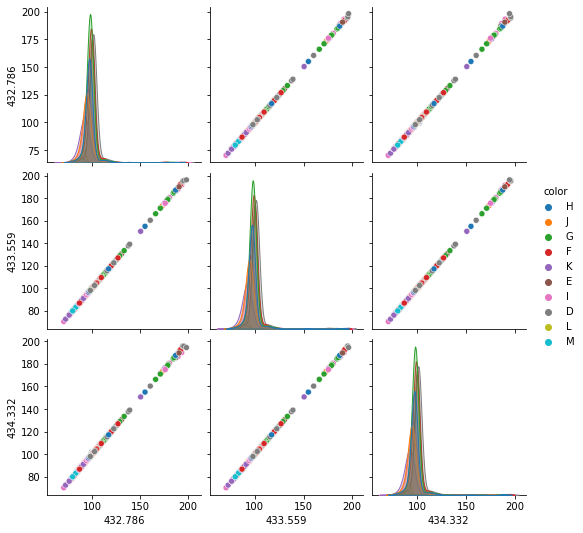

In [ ]:
sns.pairplot(data=pd.concat([df_visu.iloc[:,170:173],df_visu.iloc[:,-1]], axis=1), hue= 'color')

<Figure size 1440x1080 with 0 Axes>

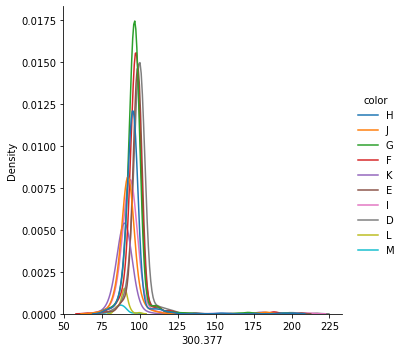

In [ ]:
plt.figure(figsize=(20, 15))
g1 = sns.displot(df_visu, x='300.377', hue="color", kind='kde')
plt.show()

In [ ]:
df_visu

,300.377,301.162,301.946,302.731,303.515,304.299,305.083,305.867,306.652,307.435,...,695.339,696.087,696.836,697.584,698.332,699.081,699.829,700.577,quality,color
0,93.9613,93.5905,93.5144,93.5858,94.0028,93.9788,94.2287,93.9844,94.2687,94.7686,...,99.3325,99.3291,99.3268,99.3363,99.3128,99.3191,99.3499,99.3758,Faint,H
1,95.5023,95.4314,95.2679,95.4398,96.0739,96.0221,96.2585,96.0292,96.0922,96.1002,...,100.367,100.313,100.299,100.263,100.211,100.192,100.196,100.221,None,J
2,96.7677,96.5512,96.178,96.4226,96.8096,96.9811,96.8336,96.8316,97.0489,96.5584,...,100.556,100.559,100.562,100.548,100.537,100.533,100.511,100.466,None,H
3,92.1969,91.9748,91.8531,92.1156,92.3446,92.4588,92.2696,92.1126,92.2204,91.899,...,99.0999,99.1498,99.158,99.1579,99.2034,99.2142,99.2092,99.1851,None,J
4,97.9493,97.5832,97.877,97.8452,98.2188,98.1894,98.1268,98.2943,97.7774,97.8066,...,101.153,101.198,101.217,101.235,101.207,101.217,101.232,101.215,None,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3858,102.085,102.288,102.411,102.742,102.243,102.222,102.215,102.256,102.208,102.234,...,103.404,103.402,103.404,103.43,103.402,103.422,103.488,103.469,None,E
3859,97.9494,98.1799,98.3628,98.0291,98.3103,98.4854,98.0282,97.5581,97.6816,97.6634,...,99.8242,99.8488,99.8604,99.8668,99.8569,99.853,99.8555,99.8538,Faint,F
3860,96.4612,96.7232,96.9706,96.8789,96.7985,97.109,97.2549,97.4836,97.5302,97.3204,...,99.9035,99.9315,99.9107,99.9335,99.917,99.9572,99.96,99.9568,None,G
3861,97.1866,97.0617,97.2634,97.698,97.2498,97.3879,97.546,97.721,98.4481,98.3731,...,100.813,100.83,100.858,100.857,100.859,100.891,100.913,100.913,None,D


In [ ]:
data1 = df_visu.drop(columns='quality')

In [ ]:
data1

color,H,J,H,J,G,F,H,F,G,K,...,D,F,H,F,G,E,F,G,D,D
300.377,93.9613,95.5023,96.7677,92.1969,97.9493,97.631,94.6716,93.5291,97.6853,91.514,...,102.27,86.0822,96.0689,99.7906,97.7799,102.085,97.9494,96.4612,97.1866,101.113
301.162,93.5905,95.4314,96.5512,91.9748,97.5832,97.4648,94.7196,93.817,97.1644,91.1543,...,102.569,85.8772,96.098,99.9357,97.5766,102.288,98.1799,96.7232,97.0617,101.097
301.946,93.5144,95.2679,96.178,91.8531,97.877,97.4253,94.6787,93.6354,97.462,91.0685,...,101.872,85.8188,95.6794,100.277,97.3229,102.411,98.3628,96.9706,97.2634,100.873
302.731,93.5858,95.4398,96.4226,92.1156,97.8452,97.1142,94.6495,93.566,97.3066,90.7305,...,101.52,86.1531,96.0844,100.421,97.9506,102.742,98.0291,96.8789,97.698,101.081
303.515,94.0028,96.0739,96.8096,92.3446,98.2188,97.5707,94.4634,93.7737,97.1128,90.6598,...,100.711,86.2355,96.1299,100.997,97.6889,102.243,98.3103,96.7985,97.2498,101.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697.584,99.3363,100.263,100.548,99.1579,101.235,100.445,97.1398,96.8469,100.694,99.0594,...,101.856,88.8975,100.019,102.42,101.185,103.43,99.8668,99.9335,100.857,101.492
698.332,99.3128,100.211,100.537,99.2034,101.207,100.451,97.1158,96.8142,100.684,99.0157,...,101.879,88.9046,100.091,102.428,101.189,103.402,99.8569,99.917,100.859,101.519
699.081,99.3191,100.192,100.533,99.2142,101.217,100.457,97.0601,96.7527,100.679,98.9548,...,101.875,88.9015,100.099,102.416,101.161,103.422,99.853,99.9572,100.891,101.567
699.829,99.3499,100.196,100.511,99.2092,101.232,100.529,97.0332,96.734,100.65,98.9542,...,101.87,88.8909,100.084,102.412,101.176,103.488,99.8555,99.96,100.913,101.566


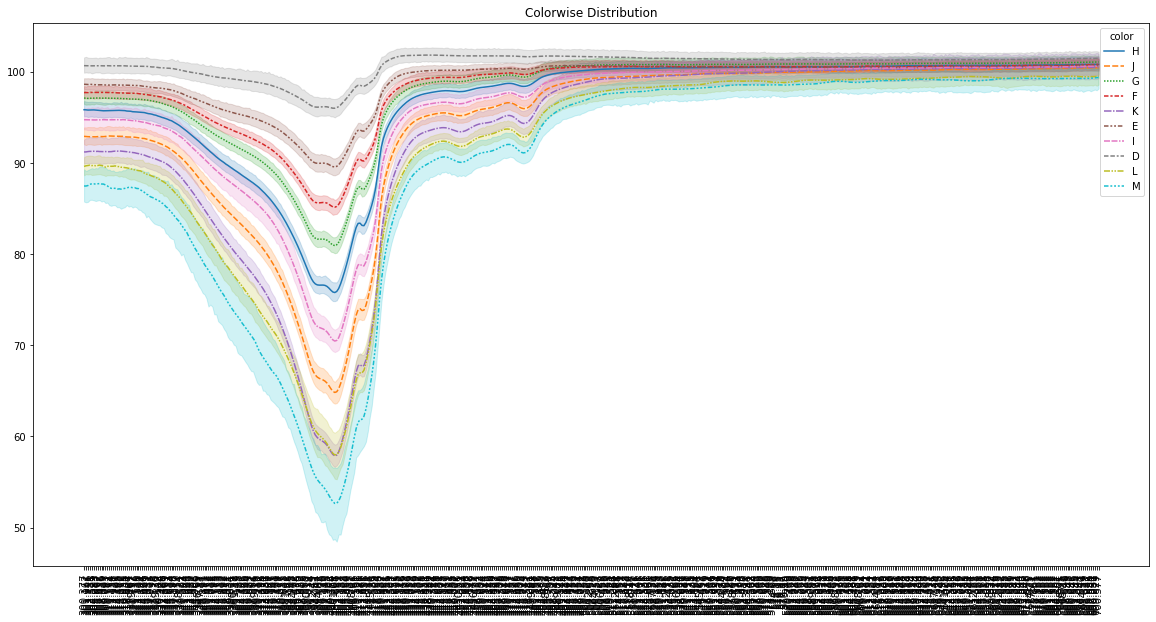

In [ ]:
plt.figure(figsize=(20,10))
# data1 = data1.set_index(["color"]).T
g1 = sns.lineplot(data=data1)
# g1.set(xticklabels=[data1.columns])
g1.set_title('Colorwise Distribution')
plt.xticks(rotation = 90)
plt.show()


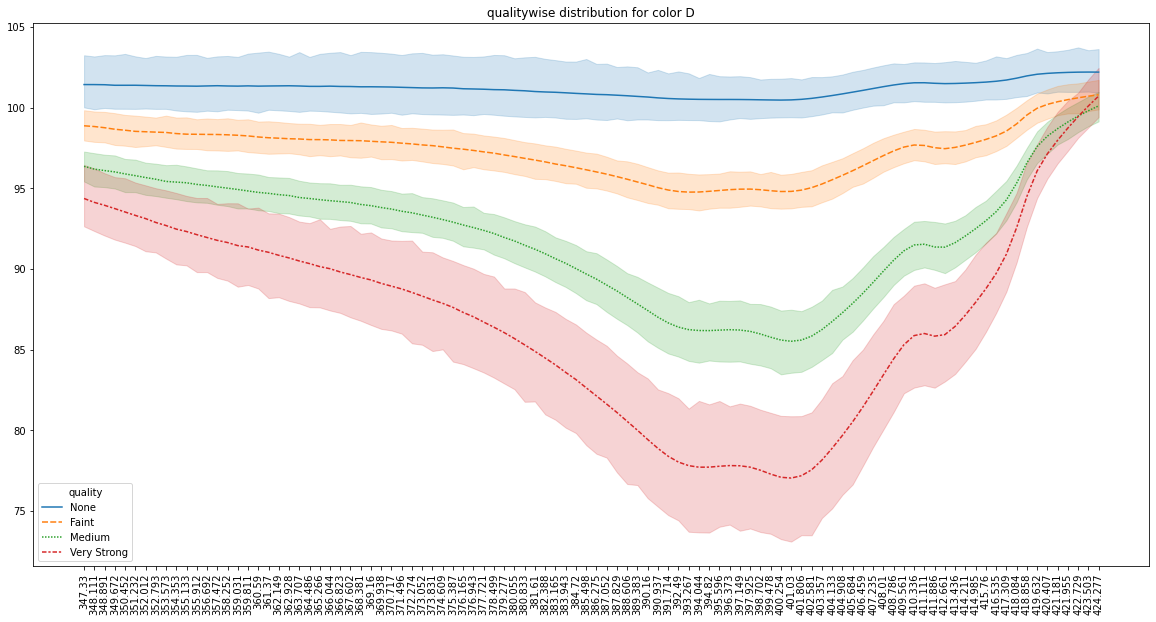

In [ ]:
df_D = pd.concat([df_visu.iloc[:,60:160], df_visu.iloc[:,-2:]], axis=1)
df_D_ = df_D[(df_D['color'] == 'D')]
df_D_.drop(columns='color', inplace=True)
plt.figure(figsize=(20,10))
data1 = df_D_.set_index(["quality"]).T
g1 = sns.lineplot(data=data1)
# g1.set(xticklabels=[data1.columns])
g1.set_title('qualitywise distribution for color D')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df_G = pd.concat([df_visu.iloc[:,60:160], df_visu.iloc[:,-2:]], axis=1)
df_G_ = df_G[(df_G['color'] == 'G')]
df_G_.drop(columns='color', inplace=True)

In [ ]:
df_F = pd.concat([df_visu.iloc[:,60:160], df_visu.iloc[:,-2:]], axis=1)
df_F_ = df_F[(df_F['color'] == 'F')]
df_F_.drop(columns='color', inplace=True)

In [ ]:
df_H = pd.concat([df_visu.iloc[:,60:160], df_visu.iloc[:,-2:]], axis=1)
df_H_ = df_H[(df_H['color'] == 'H')]
df_H_.drop(columns='color', inplace=True)

In [ ]:
df_E = pd.concat([df_visu.iloc[:,60:160], df_visu.iloc[:,-2:]], axis=1)
df_E_ = df_E[(df_E['color'] == 'E')]
df_E_.drop(columns='color', inplace=True)

In [ ]:
df_E = pd.concat([df_visu.iloc[:,60:160], df_visu.iloc[:,-2:]], axis=1)
df_E_ = df_E[(df_E['color'] == 'E')]
df_E_.drop(columns='color', inplace=True)

In [ ]:
df_I = pd.concat([df_visu.iloc[:,60:160], df_visu.iloc[:,-2:]], axis=1)
df_I_ = df_I[(df_I['color'] == 'I')]
df_I_.drop(columns='color', inplace=True)

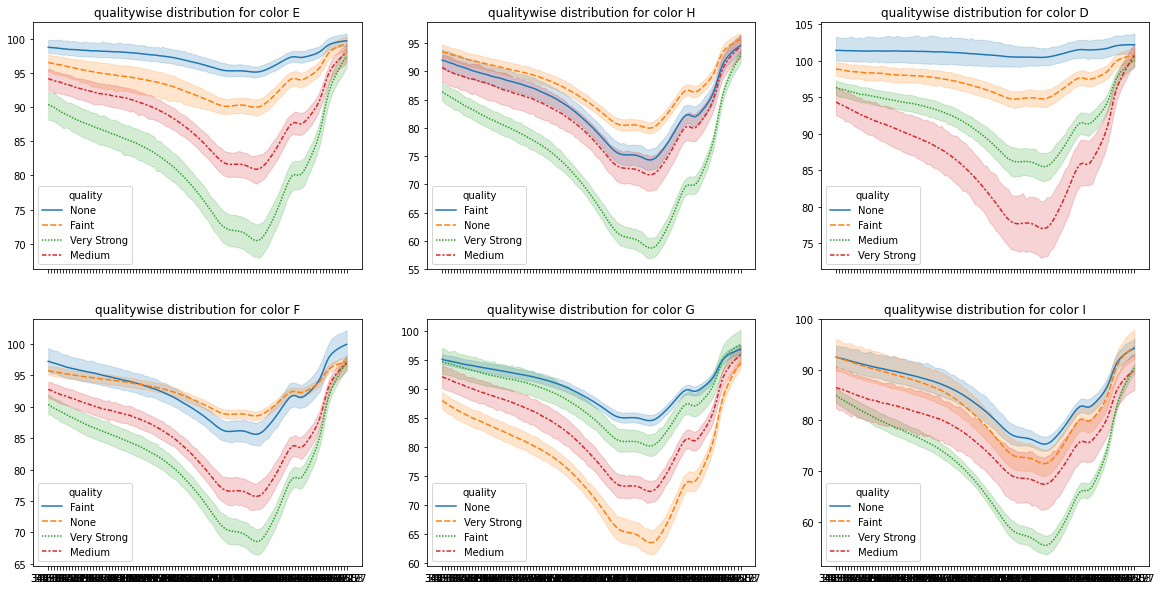

In [ ]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(20,10))

sns.lineplot(ax = axes[0,0] ,data=df_E_.set_index(["quality"]).T)
axes[0,0].set_title('qualitywise distribution for color E')

sns.lineplot(ax = axes[0,1] ,data=df_H_.set_index(["quality"]).T)
axes[0,1].set_title('qualitywise distribution for color H')

sns.lineplot(ax = axes[1,0] ,data=df_F_.set_index(["quality"]).T)
axes[1,0].set_title('qualitywise distribution for color F')

sns.lineplot(ax = axes[1,1] ,data=df_G_.set_index(["quality"]).T)
axes[1,1].set_title('qualitywise distribution for color G')

sns.lineplot(ax = axes[0,2] ,data=df_D_.set_index(["quality"]).T)
axes[0,2].set_title('qualitywise distribution for color D')

sns.lineplot(ax = axes[1,2] ,data=df_I_.set_index(["quality"]).T)
axes[1,2].set_title('qualitywise distribution for color I')


plt.show()

<AxesSubplot:>

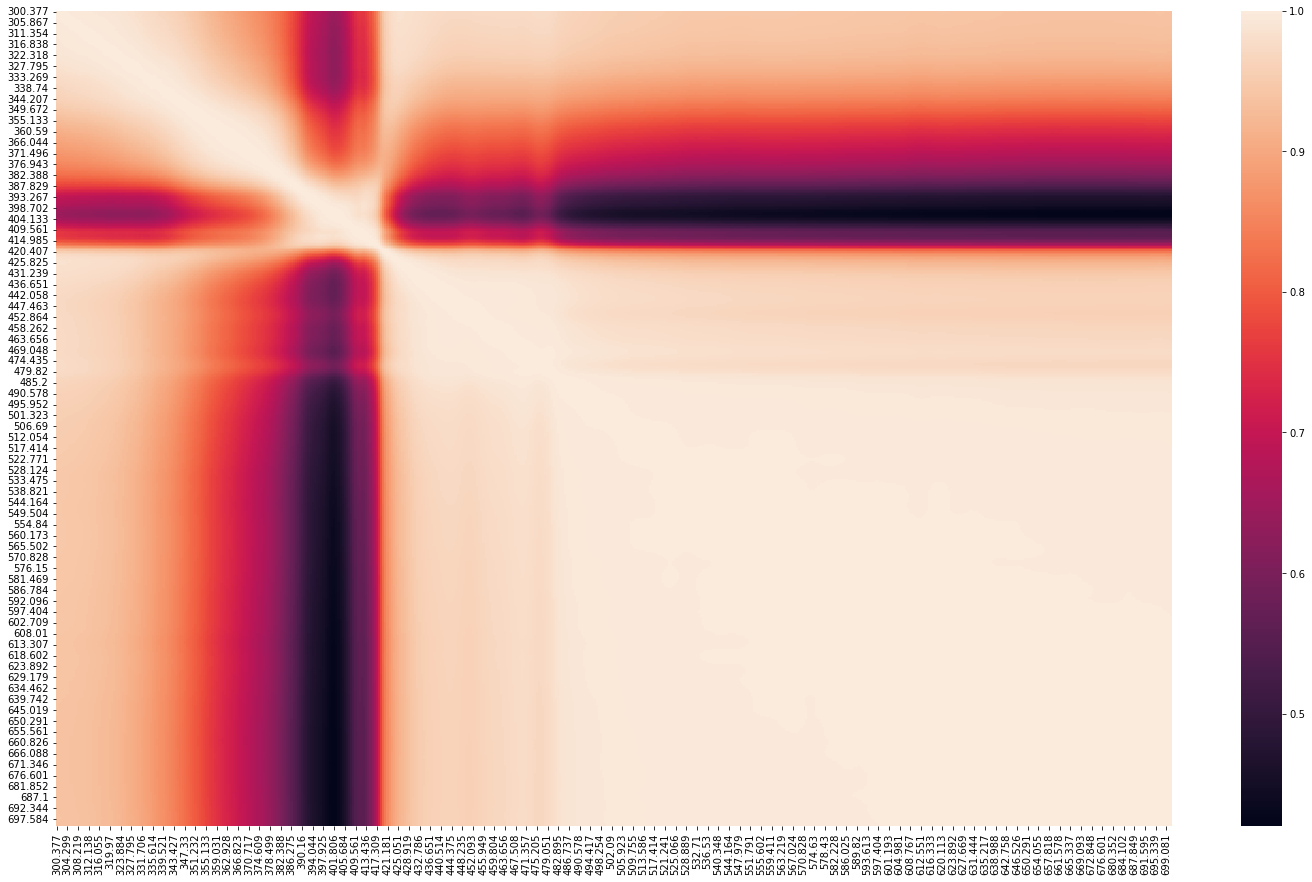

In [ ]:
plt.figure(figsize=(25, 15))
data_corr = df_visu.iloc[:,:-2  ].astype('float')
sns.heatmap(data=data_corr.corr())

# Feature Selection

In [ ]:
X = df_visu.iloc[:,:-1]
Y = df_visu.iloc[:,-1]
X = pd.get_dummies(X)

In [ ]:
Y.replace({'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7, 'K':8, 'L':9, 'M':10}, inplace=True)

In [ ]:
lb_enco  = preprocessing.LabelEncoder()

In [ ]:
Y = lb_enco.fit_transform(Y)

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [ ]:
tr = DropCorrelatedFeatures(variables=None, method='spearman', threshold=0.5)

In [ ]:
xt = tr.fit_transform(df_visu.iloc[:,:-2])

In [ ]:
xt

,300.377
0,93.9613
1,95.5023
2,96.7677
3,92.1969
4,97.9493
...,...
3851,102.0850
3852,97.9494
3853,96.4612
3854,97.1866


In [ ]:
sel = SelectBySingleFeaturePerformance(
        estimator=RandomForestClassifier(), scoring="f1_weighted", cv=3, threshold=0.5)

In [ ]:
sel.fit(X, Y)

In [ ]:
X.shape

(3856, 524)

In [ ]:
tr = SelectByShuffling(estimator=RandomForestClassifier(), scoring="f1_weighted", cv=3)


In [ ]:
tr.fit_transform(X,Y)

,301.162,301.946,305.083,305.867,306.652,307.435,309.003,309.787,312.921,313.705,...,693.093,694.59,695.339,696.836,697.584,699.081,699.829,700.577,quality_Faint,quality_None
0,93.5905,93.5144,94.2287,93.9844,94.2687,94.7686,95.0911,94.8628,94.4940,94.1478,...,99.4211,99.3509,99.3325,99.3268,99.3363,99.3191,99.3499,99.3758,1,0
1,95.4314,95.2679,96.2585,96.0292,96.0922,96.1002,96.5075,96.5873,95.8714,96.1244,...,100.5760,100.4070,100.3670,100.2990,100.2630,100.1920,100.1960,100.2210,0,1
2,96.5512,96.1780,96.8336,96.8316,97.0489,96.5584,97.0326,96.5052,96.6469,96.3277,...,100.4720,100.5550,100.5560,100.5620,100.5480,100.5330,100.5110,100.4660,0,1
3,91.9748,91.8531,92.2696,92.1126,92.2204,91.8990,92.6573,92.3858,92.4275,92.1161,...,98.9661,99.0442,99.0999,99.1580,99.1579,99.2142,99.2092,99.1851,0,1
4,97.5832,97.8770,98.1268,98.2943,97.7774,97.8066,97.7441,97.7265,97.5641,97.9076,...,101.1270,101.1350,101.1530,101.2170,101.2350,101.2170,101.2320,101.2150,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3851,102.2880,102.4110,102.2150,102.2560,102.2080,102.2340,102.3400,101.7980,102.4570,102.3370,...,103.3430,103.4210,103.4040,103.4040,103.4300,103.4220,103.4880,103.4690,0,1
3852,98.1799,98.3628,98.0282,97.5581,97.6816,97.6634,97.2440,97.1754,97.2221,97.3487,...,99.8471,99.8490,99.8242,99.8604,99.8668,99.8530,99.8555,99.8538,1,0
3853,96.7232,96.9706,97.2549,97.4836,97.5302,97.3204,97.0567,97.2794,96.5754,96.5901,...,99.9688,99.9622,99.9035,99.9107,99.9335,99.9572,99.9600,99.9568,0,1
3854,97.0617,97.2634,97.5460,97.7210,98.4481,98.3731,98.7043,98.7452,98.5602,98.3619,...,100.8290,100.8070,100.8130,100.8580,100.8570,100.8910,100.9130,100.9130,0,1


In [ ]:
tr = RecursiveFeatureAddition(estimator=RandomForestClassifier(), scoring="f1_weighted", cv=5)

In [ ]:
xt = tr.fit_transform(X,Y)

In [ ]:
xt

,300.377,321.536,379.277,401.806,410.336,416.535,418.084,419.632,425.825,451.321,467.508,696.087,quality_None
0,93.9613,94.4565,87.1189,72.2843,79.1364,84.5349,87.4785,90.7707,95.9703,96.3819,97.3777,99.3291,0
1,95.5023,95.6212,90.3029,67.7236,75.4103,82.9426,86.5565,90.6102,97.3157,95.4767,97.4714,100.3130,1
2,96.7677,97.3287,92.2117,83.8149,88.8999,91.3659,92.8651,94.6104,97.5789,97.4105,98.4471,100.5590,1
3,92.1969,91.5992,82.1606,68.8487,76.8575,82.0879,84.9553,88.0880,93.0090,94.1889,95.3538,99.1498,1
4,97.9493,96.8277,91.3611,85.8260,90.3829,92.7600,94.2522,95.9721,98.1338,99.2083,100.2320,101.1980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3851,102.0850,101.9950,100.7820,97.6178,100.3690,100.5690,101.1580,102.0450,102.8290,103.2210,103.4520,103.4020,1
3852,97.9494,98.4668,94.5332,89.8237,93.8305,94.6176,95.6152,97.2184,98.4649,99.1086,99.3333,99.8488,0
3853,96.4612,98.6285,91.4589,84.4690,90.3178,91.4181,92.8781,95.2535,97.4747,98.3148,98.8214,99.9315,1
3854,97.1866,98.4277,96.2649,94.1701,95.8301,96.2786,96.5597,97.0195,97.5754,98.5804,98.9245,100.8300,1


In [ ]:
X.iloc[:,:-4]

,300.377,301.162,301.946,302.731,303.515,304.299,305.083,305.867,306.652,307.435,...,693.841,694.59,695.339,696.087,696.836,697.584,698.332,699.081,699.829,700.577
0,93.9613,93.5905,93.5144,93.5858,94.0028,93.9788,94.2287,93.9844,94.2687,94.7686,...,99.3577,99.3509,99.3325,99.3291,99.3268,99.3363,99.3128,99.3191,99.3499,99.3758
1,95.5023,95.4314,95.2679,95.4398,96.0739,96.0221,96.2585,96.0292,96.0922,96.1002,...,100.4920,100.4070,100.3670,100.3130,100.2990,100.2630,100.2110,100.1920,100.1960,100.2210
2,96.7677,96.5512,96.1780,96.4226,96.8096,96.9811,96.8336,96.8316,97.0489,96.5584,...,100.5110,100.5550,100.5560,100.5590,100.5620,100.5480,100.5370,100.5330,100.5110,100.4660
3,92.1969,91.9748,91.8531,92.1156,92.3446,92.4588,92.2696,92.1126,92.2204,91.8990,...,99.0345,99.0442,99.0999,99.1498,99.1580,99.1579,99.2034,99.2142,99.2092,99.1851
4,97.9493,97.5832,97.8770,97.8452,98.2188,98.1894,98.1268,98.2943,97.7774,97.8066,...,101.1340,101.1350,101.1530,101.1980,101.2170,101.2350,101.2070,101.2170,101.2320,101.2150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3851,102.0850,102.2880,102.4110,102.7420,102.2430,102.2220,102.2150,102.2560,102.2080,102.2340,...,103.3880,103.4210,103.4040,103.4020,103.4040,103.4300,103.4020,103.4220,103.4880,103.4690
3852,97.9494,98.1799,98.3628,98.0291,98.3103,98.4854,98.0282,97.5581,97.6816,97.6634,...,99.8285,99.8490,99.8242,99.8488,99.8604,99.8668,99.8569,99.8530,99.8555,99.8538
3853,96.4612,96.7232,96.9706,96.8789,96.7985,97.1090,97.2549,97.4836,97.5302,97.3204,...,99.9581,99.9622,99.9035,99.9315,99.9107,99.9335,99.9170,99.9572,99.9600,99.9568
3854,97.1866,97.0617,97.2634,97.6980,97.2498,97.3879,97.5460,97.7210,98.4481,98.3731,...,100.8290,100.8070,100.8130,100.8300,100.8580,100.8570,100.8590,100.8910,100.9130,100.9130


In [ ]:
point_bi_serial_list = X.iloc[:,:-4].columns

In [ ]:
point_bi_serial_list

Index(['300.377', '301.162', '301.946', '302.731', '303.515', '304.299',
       '305.083', '305.867', '306.652', '307.435',
       ...
       '693.841', '694.59', '695.339', '696.087', '696.836', '697.584',
       '698.332', '699.081', '699.829', '700.577'],
      dtype='object', length=523)

In [ ]:
df_visu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3856 entries, 0 to 3855
Columns: 525 entries, 300.377 to color
dtypes: float64(523), object(2)
memory usage: 15.4+ MB


### pointBiserial


In [ ]:
pointbiserialr(Y, df_visu['300.377'])[0]

-0.28041124415015267

In [ ]:
impo_feat = []

In [ ]:
for i in point_bi_serial_list:
    pbc = pointbiserialr(Y, df_visu[i])
    if abs(pbc[0]) > 0.5:
        impo_feat.append(i)

### Drop constant feartures

In [1]:
transformer = DropConstantFeatures(tol=0.7)

NameError: name 'DropConstantFeatures' is not defined

In [ ]:
transformer.fit(X)

DropConstantFeatures(tol=0.7)

In [ ]:
transformer.transform(X)

,300.377,301.162,301.946,302.731,303.515,304.299,305.083,305.867,306.652,307.435,...,694.59,695.339,696.087,696.836,697.584,698.332,699.081,699.829,700.577,quality_None
0,93.9613,93.5905,93.5144,93.5858,94.0028,93.9788,94.2287,93.9844,94.2687,94.7686,...,99.3509,99.3325,99.3291,99.3268,99.3363,99.3128,99.3191,99.3499,99.3758,0
1,95.5023,95.4314,95.2679,95.4398,96.0739,96.0221,96.2585,96.0292,96.0922,96.1002,...,100.4070,100.3670,100.3130,100.2990,100.2630,100.2110,100.1920,100.1960,100.2210,1
2,96.7677,96.5512,96.1780,96.4226,96.8096,96.9811,96.8336,96.8316,97.0489,96.5584,...,100.5550,100.5560,100.5590,100.5620,100.5480,100.5370,100.5330,100.5110,100.4660,1
3,92.1969,91.9748,91.8531,92.1156,92.3446,92.4588,92.2696,92.1126,92.2204,91.8990,...,99.0442,99.0999,99.1498,99.1580,99.1579,99.2034,99.2142,99.2092,99.1851,1
4,97.9493,97.5832,97.8770,97.8452,98.2188,98.1894,98.1268,98.2943,97.7774,97.8066,...,101.1350,101.1530,101.1980,101.2170,101.2350,101.2070,101.2170,101.2320,101.2150,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3851,102.0850,102.2880,102.4110,102.7420,102.2430,102.2220,102.2150,102.2560,102.2080,102.2340,...,103.4210,103.4040,103.4020,103.4040,103.4300,103.4020,103.4220,103.4880,103.4690,1
3852,97.9494,98.1799,98.3628,98.0291,98.3103,98.4854,98.0282,97.5581,97.6816,97.6634,...,99.8490,99.8242,99.8488,99.8604,99.8668,99.8569,99.8530,99.8555,99.8538,0
3853,96.4612,96.7232,96.9706,96.8789,96.7985,97.1090,97.2549,97.4836,97.5302,97.3204,...,99.9622,99.9035,99.9315,99.9107,99.9335,99.9170,99.9572,99.9600,99.9568,1
3854,97.1866,97.0617,97.2634,97.6980,97.2498,97.3879,97.5460,97.7210,98.4481,98.3731,...,100.8070,100.8130,100.8300,100.8580,100.8570,100.8590,100.8910,100.9130,100.9130,1
